In [ ]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Econ 484/auxiliaries'
import warnings
warnings.filterwarnings('ignore')
from preamble import *

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Econ 484/auxiliaries


##### Linear models for classification
Review:

**Maximum Margin Classifiers** use a linear decision boundary and require perfect separation

**Support Vector Classifiers** use a linear decision boundary, but allow imperfect separation

**Support Vector machines** allow nonlinear decision boundaries and imperfect separation. They use kernel functions to accommodate nonlinearities

First: let's see how to implement **Support Vector Classifiers**. Note, one probably would always rather use SVMs, but SVCs are nice for visualizing and understanding what is going on. And if the true decision boundary is actually linear, SVCs will do better.

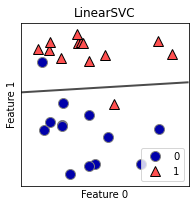

In [ ]:
# To use SVCs, import its package from sklearn:
from sklearn.svm import LinearSVC

# generate some fake data for visualization:
X, y = mglearn.datasets.make_forge()

# fit a SVC to the data using the default value for C (look it up on Google to see what it is!)
clf = LinearSVC().fit(X, y)

# plot the resulting decision boundary and training data points
fig, axes = plt.subplots(1, 1, figsize=(3, 3))
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=axes, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes)
axes.set_title(clf.__class__.__name__)
axes.set_xlabel("Feature 0")
axes.set_ylabel("Feature 1")
axes.legend()

Let's play with the regularization parameter, C, to see how it impacts the performance of the SVC. Review: what does C mean in SVCs? (it is the violation "budget"). Note that "C" as implemented in sklearn is inversely proportional to the degree of regularization: lower values of C means more tolerant of violations, higher values means less tolerant

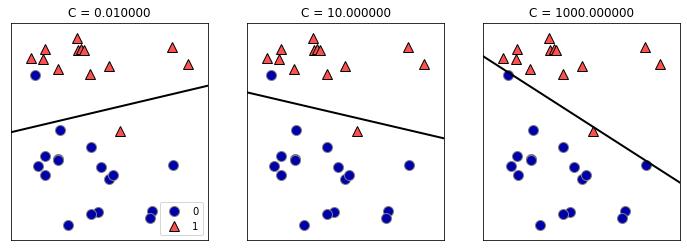

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

Now let's use SVC on some real data, and play with the tuning parameter, C.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

lsvc = LinearSVC().fit(X_train, y_train)
print("Training set score: {:.3f}".format(lsvc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lsvc.score(X_test, y_test)))

Training set score: 0.817
Test set score: 0.797


In [ ]:
#transform the data. This is standard for logit and svm for classification/prediction. Standard is to transform after train test split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #create scaler object
scaler.fit(X_train) #feed the scaler object the x
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)


In [ ]:
lsvc100 = LinearSVC(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lsvc100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lsvc100.score(X_test, y_test)))

Training set score: 0.986
Test set score: 0.881


In [ ]:
lsvc001 = LinearSVC(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lsvc001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lsvc001.score(X_test, y_test)))

Training set score: 0.986
Test set score: 0.986


On your own, add some code to first standardize the feature matrix (be sure to standardize the test set using the mean and variance adjustment calculated on the training set. Does performance improve after standardizing?

#### Kernelized Support Vector Machines
#### Linear Models and Non-linear Features
Let's now allow for non-linear decision boundaries by using SVMs with kernels

Text(0, 0.5, 'Feature 1')

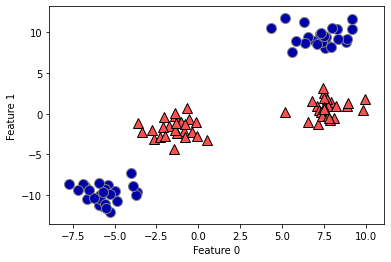

In [ ]:
# First, generate some fake, nonlinear data
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Let's see linear SVC fail here:

Text(0, 0.5, 'Feature 1')

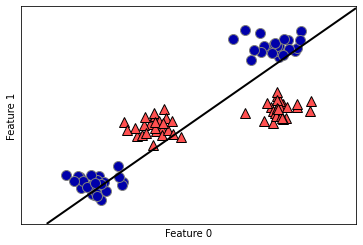

In [ ]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Old-school way to accommodate nonlinear using a linear model: just add squares of the X variables:

Text(0.5, 0, 'feature1 ** 2')

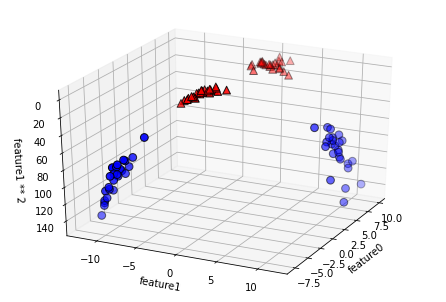

In [ ]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In 3d space, once we've added the squared term, can do a reasonable job of separating the blues from the reds with a plane. Let's do that:

Text(0.5, 0, 'feature1 ** 2')

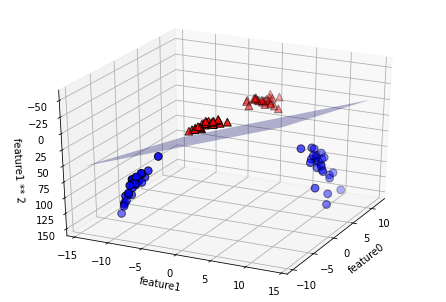

In [ ]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

A linear plane in 3-dimensions does pretty well! The 3d linear plane corresponds to a nonlinear decision boundary in the original (2d) feature space. Let's plot it:

Text(0, 0.5, 'Feature 1')

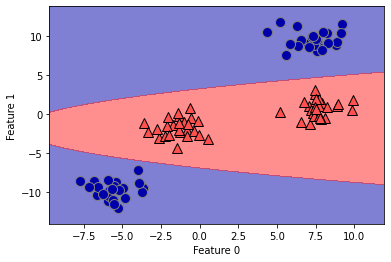

In [ ]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

italicized text#### The Kernel Trick
#### Understanding SVMs

We can generalize the idea of adding nonlinear terms to the feature set by using kernel functions, which is what SVMs do.

Text(0, 0.5, 'Feature 1')

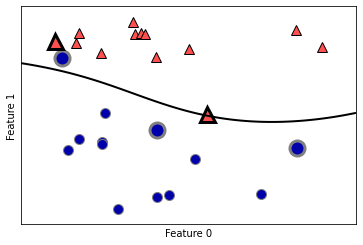

In [ ]:
# To implement a nonlinear SVM, import the SVC package (instead of LinearSVC as we did above)
from sklearn.svm import SVC

# generate some fake data
X, y = mglearn.tools.make_handcrafted_dataset()    

# create and fit our support vector machine, setting tuning parameters:
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)

# plot the resulting decision boundary
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The support vectors are observations exactly on the margin, or that violate the margin (including violating the boundary). They are indicated by thicker shape borders.

#### Tuning SVM parameters
Let's see how different choice of tuning parameters affects the algorithm:

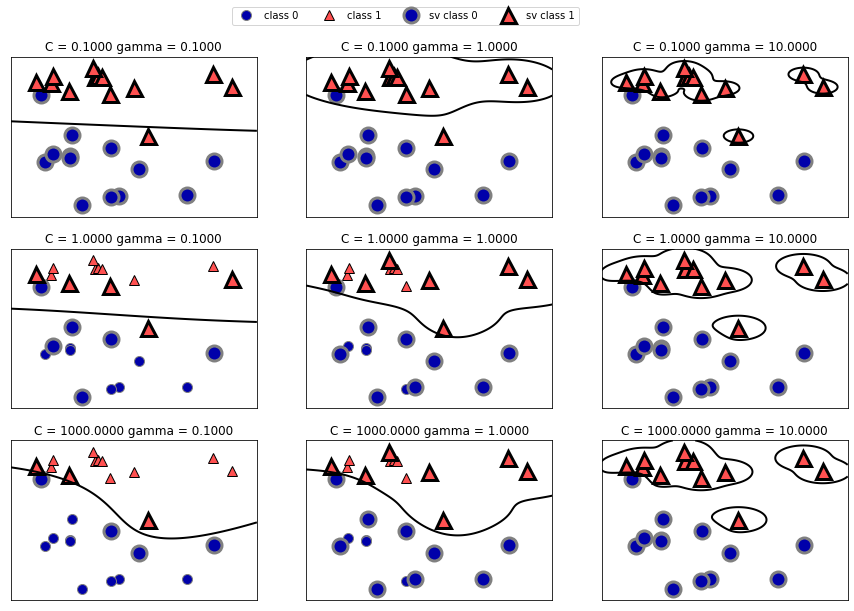

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

And now let's try it on some real data:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


Let's graph some summary stats on the X variables, because SVMs don't work great when X variables have very different scales:

Text(0, 0.5, 'Feature magnitude')

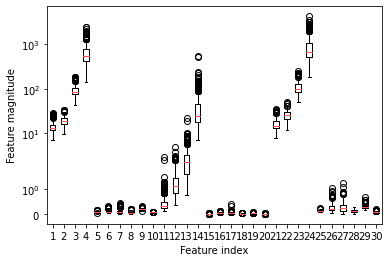

In [ ]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

Ouch! Those features are all over the place. We could definitely benefit from standardizing our data:

##### Preprocessing data for SVMs

In [ ]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

#this is an alternative to the standard scaler

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

Now let's re-fit our SVM using our scaled data:

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


Big improvement! let's now play around the with tuning parameters:

In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


To do on your own: do a formal cross validation to find the optimal values for C and gamma on the scaled cancer data

In [ ]:
from sklearn.model_selection import GridSearchCV
# define grid for parameters
param_grid = {'C': [.01,.05,.1, .15,.2,.3,.4,.5,1],'gamma': [1,1.1,1.2,1.3,1.5,1.7,2,2.5],'kernel':['rbf','poly','linear']}
grid_search = GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(X_train_scaled,y_train)
print("Best C: ",best_model.best_estimator_.get_params()['C'])
print("Best gamma: ",best_model.best_estimator_.get_params()['gamma'])
print("Best kernel: ",best_model.best_estimator_.get_params()['kernel'])

# print out scores
print("Accuracy on training set: {:.3f}".format(
    best_model.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model.score(X_test_scaled, y_test)))

Best C:  0.05
Best gamma:  2
Best kernel:  poly
Accuracy on training set: 0.986
Accuracy on test set: 0.965
